# Pipelines and HuggingFace

Utilizing HuggingFace Pipelines and testing different usecases 

``` !nvidia-smi ```
  - nvidia-smi is NVIDIA’s command-line tool that reports GPU status (drivers, memory usage, temperature, running processes, etc.).

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if gpu_info.find('failed') >=0:
  print("Not connected to GPU")
else:
  print(gpu_info)

Sat Sep 27 02:50:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q --upgrade torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1+cu124 --index-url https://download.pytorch.org/whl/cu124

!pip install -q --upgrade transformers==4.48.3 datasets==3.2.0 diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.2/908.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 716.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 999.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Import needed Libraries
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [4]:
# Sentiment Analysis with Pipeline
classifier = pipeline("sentiment-analysis", device='cuda', model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')

result = classifier("My Girlfriend is the prettiest girl in the world")
print(result)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9996755123138428}]


In [5]:
# Name Entity Recognition
name_entity_recognition = pipeline("ner", device='cuda', aggregation_strategy="simple")
result = name_entity_recognition("Barack Obama was the 44th President of the United States")

print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9991417), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.99403036), 'word': 'United States', 'start': 43, 'end': 56}]


In [6]:
# Question-Answering
q_and_a = pipeline("question-answering")

# Context: a paragraph about cars
supra_context = """
The Toyota Supra is a sports car produced by Toyota Motor Corporation.
It was first introduced in 1978 and has become popular among car enthusiasts
for its performance and tuning potential with 1000+ horsepower being achievable by the 2jz and B58 engines. The fifth generation, known as the A90,
was developed in partnership with BMW and shares many components with the BMW Z4.
"""

result = q_and_a(question="How fast is the supra come?", context=supra_context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.9247416257858276, 'start': 197, 'end': 213, 'answer': '1000+ horsepower'}


In [7]:
# Text Summarization

summarization = pipeline("summarization", device="cuda")

text = """
The Toyota Supra has become one of the most iconic Japanese sports cars of all time. First introduced in 1978, it evolved over four generations, gaining a reputation for speed, balance, and tuning potential.The fourth-generation Supra, known as the A80 and produced in the 1990s, is especially legendary thanks to its 2JZ-GTE engine, which is famous for handling extreme horsepower upgrades.After being discontinued in 2002, the Supra made a comeback in 2019 with the fifth generation, the A90, developed in partnership with BMW.This modern Supra shares a platform with the BMW Z4 and is powered by a turbocharged inline-six engine, combining heritage with modern performance. Car enthusiasts continue to celebrate the Supra both for its history in motorsports and its strong presence in car culture, from movies like *The Fast and the Furious* to real-world racing.
"""

summary = summarization(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Device set to use cuda


 The Toyota Supra was first introduced in 1978 and is one of the most iconic Japanese sports cars of all time . The fourth-generation Supra, known as the A80, is especially legendary thanks to its 2JZ-G


In [8]:
# Translation

translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
result = translator("You look very beautiful")

print(result[0]["translation_text"])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


Te ves muy hermosa.


In [9]:
# Text Generation

text_generator = pipeline("text-generation", device="cuda")

result = text_generator("In our History The 44th president was named")

print(result[0]["generated_text"])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In our History The 44th president was named to the Senate Armed Forces Committee, a committee with considerable authority to conduct its investigation of armed conflicts and issues of public interest. The committee was, in fact, an independent body which the armed forces of North


In [10]:
#Classifier
classifier = pipeline("zero-shot-classification", device="cuda")

result = classifier(
    "This is practice on using HuggingFace Transformer pipelines ",
    candidate_labels=["technology", "politics", "business"],
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': 'This is practice on using HuggingFace Transformer pipelines ', 'labels': ['technology', 'business', 'politics'], 'scores': [0.8617331981658936, 0.11996445059776306, 0.018302325159311295]}


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

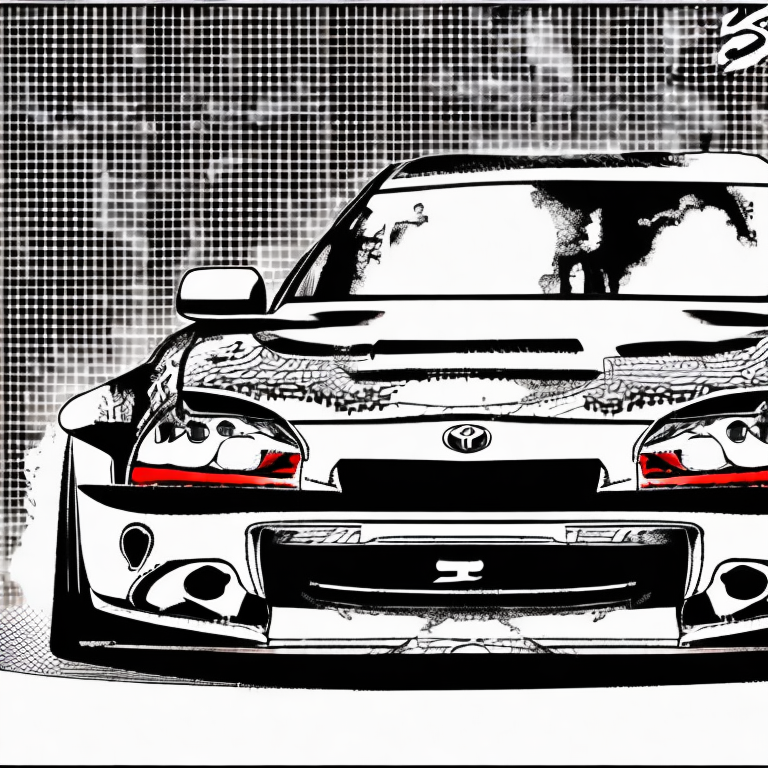

In [16]:
#Image Generation
image_generation = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16, use_safetensors=True, variant="fp16").to("cuda")

text = "Toyota Supra drifting in Naruto manga style"
image = image_generation(prompt=text).images[0]
image

In [29]:
# Audio Generation

audio_synth = pipeline("text-to-speech", model="microsoft/speecht5_tts",device="cuda")

voice_embedding_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(voice_embedding_dataset[7307]["xvector"]).unsqueeze(0)

speech = audio_synth("Toyota Supra is the best jdm car", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("audio.wav", speech["audio"], speech["sampling_rate"])
Audio("audio.wav")

Device set to use cuda


## Sidenote:

You may already know this, but just in case you're not familiar with the word "inference" that I use here:

When working with Data Science models, you could be carrying out 2 very different activities: **training** and **inference**.

### 1. Training  

**Training** is when you provide a model with data for it to adapt to get better at a task in the future. It does this by updating its internal settings - the parameters or weights of the model. If you're Training a model that's already had some training, the activity is called "fine-tuning".

### 2. Inference

**Inference** is when you are working with a model that has _already been trained_. You are using that model to produce new outputs on new inputs, taking advantage of everything it learned while it was being trained. Inference is also sometimes referred to as "Execution" or "Running a model".

All of our use of APIs for GPT, Claude and Gemini in the last weeks are examples of **inference**. The "P" in GPT stands for "Pre-trained", meaning that it has already been trained with data (lots of it!) In week 6 we will try fine-tuning GPT ourselves.
  
The pipelines API in HuggingFace is only for use for **inference** - running a model that has already been trained. In week 7 we will be training our own model, and we will need to use the more advanced HuggingFace APIs that we look at in the up-coming lecture.

I recorded this playlist on YouTube with more on parameters, training and inference:  
https://www.youtube.com/playlist?list=PLWHe-9GP9SMMdl6SLaovUQF2abiLGbMjs


# Resources and References


Pipelines - https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#pipelines
